In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv('preprocessed.csv', index_col=0)
df

,B365H,B365D,B365A,B365>2.5,B365<2.5,FTR,FTHG,FTAG,HTR,HTHG,HTAG,HS,AS,HST,AST
15554,1.36,4.75,8.50,1.53,2.40,H,2.0,1.0,A,0.0,1.0,10.0,8.0,2.0,4.0
15555,3.75,3.75,1.85,1.75,2.05,A,0.0,2.0,D,0.0,0.0,13.0,14.0,5.0,9.0
15556,1.90,3.75,3.75,1.80,2.00,A,0.0,1.0,A,0.0,1.0,10.0,10.0,4.0,6.0
15557,2.15,3.60,3.10,1.66,2.15,A,0.0,2.0,A,0.0,1.0,7.0,10.0,2.0,5.0
15558,6.50,4.00,1.50,1.57,2.35,A,1.0,3.0,D,1.0,1.0,7.0,25.0,2.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337731,12.00,5.75,1.22,1.40,2.87,A,0.0,5.0,A,0.0,1.0,7.0,29.0,4.0,12.0
337732,1.80,3.60,4.33,1.80,2.05,H,3.0,1.0,H,3.0,0.0,12.0,14.0,4.0,6.0
337733,3.10,3.60,2.20,1.53,2.40,A,0.0,1.0,A,0.0,1.0,17.0,18.0,5.0,6.0
337734,1.40,5.00,6.00,1.36,3.10,H,7.0,0.0,H,5.0,0.0,23.0,6.0,10.0,1.0


# data augmentation
add probabilities and odds of each class

In [18]:
#inverse
# W/D/A
df['Home_Win_Odds'] = df['B365A'] / df['B365H']
df['Home_Win_Prob'] = df['B365H'].rdiv(1) / (df['B365H'].rdiv(1) + df['B365D'].rdiv(1) + df['B365A'].rdiv(1))

df['Away_Win_Odds'] = df['B365H'] / df['B365A']
df['Away_Win_Prob'] = df['B365A'].rdiv(1) / (df['B365H'].rdiv(1) + df['B365D'].rdiv(1) + df['B365A'].rdiv(1))

df['Draw_Prob'] = df['B365D'].rdiv(1) / (df['B365H'].rdiv(1) + df['B365D'].rdiv(1) + df['B365A'].rdiv(1))

df

,B365H,B365D,B365A,B365>2.5,B365<2.5,FTR,FTHG,FTAG,HTR,HTHG,HTAG,HS,AS,HST,AST,Home_Win_Odds,Home_Win_Prob,Away_Win_Odds,Away_Win_Prob,Draw_Prob
15554,1.36,4.75,8.50,1.53,2.40,H,2.0,1.0,A,0.0,1.0,10.0,8.0,2.0,4.0,6.250000,0.691412,0.160000,0.110626,0.197962
15555,3.75,3.75,1.85,1.75,2.05,A,0.0,2.0,D,0.0,0.0,13.0,14.0,5.0,9.0,0.493333,0.248322,2.027027,0.503356,0.248322
15556,1.90,3.75,3.75,1.80,2.00,A,0.0,1.0,A,0.0,1.0,10.0,10.0,4.0,6.0,1.973684,0.496689,0.506667,0.251656,0.251656
15557,2.15,3.60,3.10,1.66,2.15,A,0.0,2.0,A,0.0,1.0,7.0,10.0,2.0,5.0,1.441860,0.436534,0.693548,0.302758,0.260708
15558,6.50,4.00,1.50,1.57,2.35,A,1.0,3.0,D,1.0,1.0,7.0,25.0,2.0,22.0,0.230769,0.143713,4.333333,0.622754,0.233533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337731,12.00,5.75,1.22,1.40,2.87,A,0.0,5.0,A,0.0,1.0,7.0,29.0,4.0,12.0,0.101667,0.077381,9.836066,0.761127,0.161491
337732,1.80,3.60,4.33,1.80,2.05,H,3.0,1.0,H,3.0,0.0,12.0,14.0,4.0,6.0,2.405556,0.522001,0.415704,0.216998,0.261001
337733,3.10,3.60,2.20,1.53,2.40,A,0.0,1.0,A,0.0,1.0,17.0,18.0,5.0,6.0,0.709677,0.305792,1.409091,0.430888,0.263320
337734,1.40,5.00,6.00,1.36,3.10,H,7.0,0.0,H,5.0,0.0,23.0,6.0,10.0,1.0,4.285714,0.660793,0.233333,0.154185,0.185022


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83396 entries, 15554 to 337735
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   B365H          83396 non-null  float64
 1   B365D          83396 non-null  float64
 2   B365A          83396 non-null  float64
 3   B365>2.5       83396 non-null  float64
 4   B365<2.5       83396 non-null  float64
 5   FTR            83396 non-null  object 
 6   FTHG           83396 non-null  float64
 7   FTAG           83396 non-null  float64
 8   HTR            83396 non-null  object 
 9   HTHG           83396 non-null  float64
 10  HTAG           83396 non-null  float64
 11  HS             83396 non-null  float64
 12  AS             83396 non-null  float64
 13  HST            83396 non-null  float64
 14  AST            83396 non-null  float64
 15  Home_Win_Odds  83396 non-null  float64
 16  Home_Win_Prob  83384 non-null  float64
 17  Away_Win_Odds  83396 non-null  float64
 18  A

found inf value in 'Home_Win_Odds', possibly caused by division of neear-zero value

In [20]:
import numpy as np
df.replace(np.inf, np.nan, inplace=True)
df.dropna(inplace=True)
df.describe()

,B365H,B365D,B365A,B365>2.5,B365<2.5,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,Home_Win_Odds,Home_Win_Prob,Away_Win_Odds,Away_Win_Prob,Draw_Prob
count,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000,83384.000000
mean,2.649340,3.730938,3.932698,1.969111,1.928147,1.442243,1.189197,0.642042,0.529742,12.550034,10.761297,4.501535,3.857479,2.156342,0.426344,1.083296,0.311072,0.262585
std,1.579177,0.956601,2.707298,0.323395,0.392464,1.241112,1.132796,0.811834,0.740581,5.021109,4.602722,2.486971,2.282660,2.529149,0.153867,1.389775,0.141595,0.042569
min,1.030000,2.000000,1.050000,1.100000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040385,0.035827,0.030294,0.027542,0.062483
25%,1.800000,3.250000,2.450000,1.720000,1.660000,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,0.833333,0.325301,0.411111,0.214008,0.248354
50%,2.250000,3.500000,3.200000,1.980000,1.850000,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.000000,4.000000,1.422222,0.417910,0.703125,0.293527,0.271647
75%,2.900000,3.800000,4.330000,2.150000,2.100000,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,2.432432,0.519836,1.200000,0.387960,0.289324
max,26.000000,15.000000,34.000000,3.500000,7.000000,9.000000,13.000000,7.000000,7.000000,46.000000,45.000000,19.000000,23.000000,33.009709,0.909951,24.761905,0.891938,0.448204


In [22]:
df.index = list(range(0, len(df)))
df.to_csv('all_bet_odds.csv')

# data visualisation

array([[<AxesSubplot:title={'center':'B365H'}>,
        <AxesSubplot:title={'center':'B365D'}>,
        <AxesSubplot:title={'center':'B365A'}>],
       [<AxesSubplot:title={'center':'B365>2.5'}>,
        <AxesSubplot:title={'center':'B365<2.5'}>,
        <AxesSubplot:title={'center':'Home_Win_Prob'}>],
       [<AxesSubplot:title={'center':'Home_Win_Odds'}>,
        <AxesSubplot:title={'center':'Away_Win_Prob'}>,
        <AxesSubplot:title={'center':'Away_Win_Odds'}>],
       [<AxesSubplot:title={'center':'Draw_Prob'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

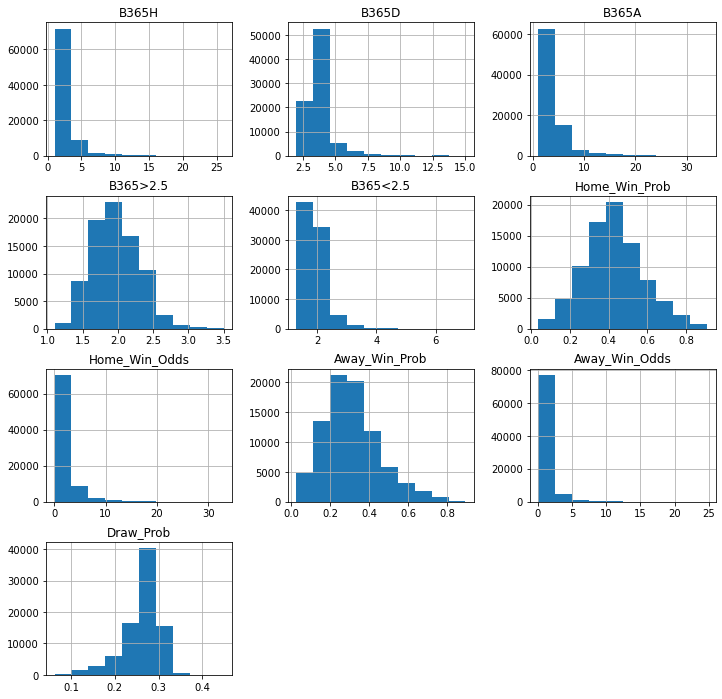

In [15]:
inde_var = ['B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5',
            'Home_Win_Prob', 'Home_Win_Odds', 'Away_Win_Prob', 'Away_Win_Odds', 'Draw_Prob']
df[inde_var].hist(figsize=(12,12))

<AxesSubplot:>

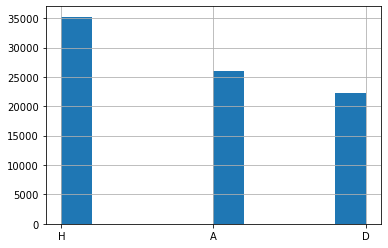

In [16]:
df['FTR'].hist()

# feature scaling
since the betting odds of match result, 'total goals < 2.5' and 'Home Win' are not normally distributed, these parameters will be normalised

the rest of the parameters follow the normal distribution and will be standardised

In [17]:
norm_list = ['B365H', 'B365D', 'B365A', 'B365<2.5', 'Home_Win_Odds', 'Away_Win_Odds']

In [18]:
std_list = ['B365>2.5','Home_Win_Prob', 'Away_Win_Prob', 'Draw_Prob']

array([[<AxesSubplot:title={'center':'B365H'}>,
        <AxesSubplot:title={'center':'B365D'}>,
        <AxesSubplot:title={'center':'B365A'}>],
       [<AxesSubplot:title={'center':'B365<2.5'}>,
        <AxesSubplot:title={'center':'Home_Win_Odds'}>,
        <AxesSubplot:title={'center':'Away_Win_Odds'}>],
       [<AxesSubplot:title={'center':'B365>2.5'}>,
        <AxesSubplot:title={'center':'Home_Win_Prob'}>,
        <AxesSubplot:title={'center':'Away_Win_Prob'}>],
       [<AxesSubplot:title={'center':'Draw_Prob'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

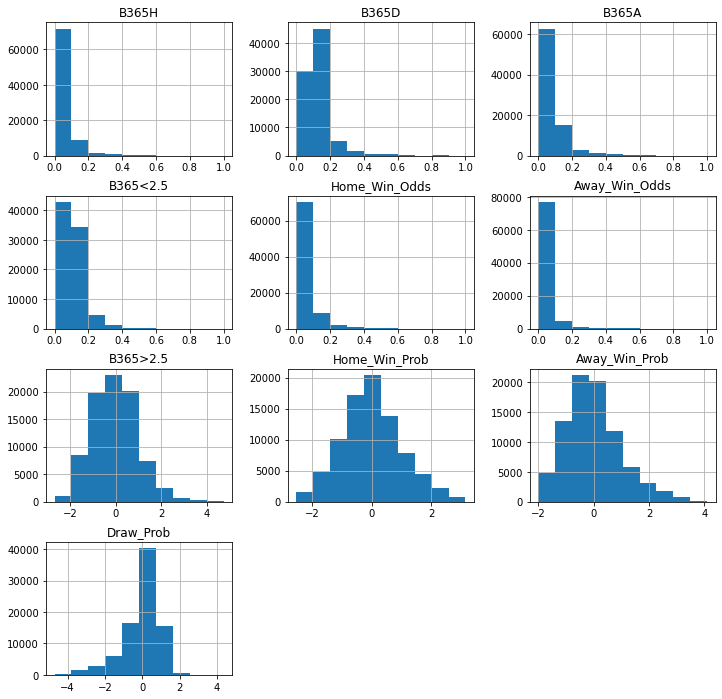

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

norm = MinMaxScaler()
std = StandardScaler()
ct = ColumnTransformer([
    ('normalisation', norm, norm_list),
    ('standardisation', std, std_list)
])

df_transformed = ct.fit_transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=df[norm_list+std_list].columns)
df_transformed.hist(figsize=(12,12))

In [20]:
df_transformed

,B365H,B365D,B365A,B365<2.5,Home_Win_Odds,Away_Win_Odds,B365>2.5,Home_Win_Prob,Away_Win_Prob,Draw_Prob
0,0.013216,0.211538,0.226100,0.192982,0.188345,0.005245,-1.357825,1.722724,-1.415632,-1.518066
1,0.108931,0.134615,0.024279,0.131579,0.013738,0.080736,-0.677538,-1.156991,1.357990,-0.335047
2,0.034842,0.134615,0.081942,0.122807,0.058639,0.019262,-0.522927,0.457185,-0.419621,-0.256739
3,0.044854,0.123077,0.062215,0.149123,0.042508,0.026818,-0.955837,0.066232,-0.058717,-0.044088
4,0.219063,0.153846,0.013657,0.184211,0.005775,0.173989,-1.234136,-1.836867,2.201234,-0.682464
...,...,...,...,...,...,...,...,...,...,...
83379,0.439327,0.288462,0.005159,0.275439,0.001859,0.396487,-1.759812,-2.267965,3.178481,-2.374810
83380,0.030837,0.123077,0.099545,0.131579,0.071739,0.015584,-0.522927,0.621695,-0.664386,-0.037214
83381,0.082899,0.123077,0.034901,0.192982,0.020300,0.055750,-1.357825,-0.783488,0.846193,0.017282
83382,0.014818,0.230769,0.150228,0.315789,0.128766,0.008210,-1.883501,1.523726,-1.107999,-1.822046


In [21]:
df_test = ct.transform(df)
df_test

array([[ 0.01321586,  0.21153846,  0.22610015, ...,  1.72272435,
        -1.41563162, -1.5180659 ],
       [ 0.10893072,  0.13461538,  0.02427921, ..., -1.15699136,
         1.35799002, -0.33504669],
       [ 0.03484181,  0.13461538,  0.08194234, ...,  0.45718527,
        -0.41962091, -0.25673904],
       ...,
       [ 0.08289948,  0.12307692,  0.03490137, ..., -0.78348825,
         0.84619308,  0.0172825 ],
       [ 0.01481778,  0.23076923,  0.15022762, ...,  1.52372637,
        -1.107999  , -1.82204568],
       [ 0.04285142,  0.10769231,  0.07132018, ...,  0.13664414,
        -0.24546057,  0.32255896]])

In [22]:
df_y = df.drop(columns=df_transformed.columns)

In [23]:
df_y

,FTR,FTHG,FTAG,HTR,HTHG,HTAG,HS,AS,HST,AST
15554,H,2.0,1.0,A,0.0,1.0,10.0,8.0,2.0,4.0
15555,A,0.0,2.0,D,0.0,0.0,13.0,14.0,5.0,9.0
15556,A,0.0,1.0,A,0.0,1.0,10.0,10.0,4.0,6.0
15557,A,0.0,2.0,A,0.0,1.0,7.0,10.0,2.0,5.0
15558,A,1.0,3.0,D,1.0,1.0,7.0,25.0,2.0,22.0
...,...,...,...,...,...,...,...,...,...,...
337731,A,0.0,5.0,A,0.0,1.0,7.0,29.0,4.0,12.0
337732,H,3.0,1.0,H,3.0,0.0,12.0,14.0,4.0,6.0
337733,A,0.0,1.0,A,0.0,1.0,17.0,18.0,5.0,6.0
337734,H,7.0,0.0,H,5.0,0.0,23.0,6.0,10.0,1.0


In [24]:
df_y.index = list(range(0, len(df_y)))

In [25]:
df_fe = pd.concat([df_transformed, df_y], axis = 1)
df_fe

,B365H,B365D,B365A,B365<2.5,Home_Win_Odds,Away_Win_Odds,B365>2.5,Home_Win_Prob,Away_Win_Prob,Draw_Prob,FTR,FTHG,FTAG,HTR,HTHG,HTAG,HS,AS,HST,AST
0,0.013216,0.211538,0.226100,0.192982,0.188345,0.005245,-1.357825,1.722724,-1.415632,-1.518066,H,2.0,1.0,A,0.0,1.0,10.0,8.0,2.0,4.0
1,0.108931,0.134615,0.024279,0.131579,0.013738,0.080736,-0.677538,-1.156991,1.357990,-0.335047,A,0.0,2.0,D,0.0,0.0,13.0,14.0,5.0,9.0
2,0.034842,0.134615,0.081942,0.122807,0.058639,0.019262,-0.522927,0.457185,-0.419621,-0.256739,A,0.0,1.0,A,0.0,1.0,10.0,10.0,4.0,6.0
3,0.044854,0.123077,0.062215,0.149123,0.042508,0.026818,-0.955837,0.066232,-0.058717,-0.044088,A,0.0,2.0,A,0.0,1.0,7.0,10.0,2.0,5.0
4,0.219063,0.153846,0.013657,0.184211,0.005775,0.173989,-1.234136,-1.836867,2.201234,-0.682464,A,1.0,3.0,D,1.0,1.0,7.0,25.0,2.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83379,0.439327,0.288462,0.005159,0.275439,0.001859,0.396487,-1.759812,-2.267965,3.178481,-2.374810,A,0.0,5.0,A,0.0,1.0,7.0,29.0,4.0,12.0
83380,0.030837,0.123077,0.099545,0.131579,0.071739,0.015584,-0.522927,0.621695,-0.664386,-0.037214,H,3.0,1.0,H,3.0,0.0,12.0,14.0,4.0,6.0
83381,0.082899,0.123077,0.034901,0.192982,0.020300,0.055750,-1.357825,-0.783488,0.846193,0.017282,A,0.0,1.0,A,0.0,1.0,17.0,18.0,5.0,6.0
83382,0.014818,0.230769,0.150228,0.315789,0.128766,0.008210,-1.883501,1.523726,-1.107999,-1.822046,H,7.0,0.0,H,5.0,0.0,23.0,6.0,10.0,1.0


# final dataset

In [105]:
df_fe.to_csv('feature_engineered.csv')